In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression# r2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.datasets import make_classification
# import accuracy metric from sklearn
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

In [2]:
dataset=pd.read_csv("multipleChoiceResponses_cleaned.csv")
dataset

,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Other - Text,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text,over_100k
0,434.0,Male,-1,34.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,Slightly worse,No opinion; I do not know,Independent projects are equally important as ...,NaN,NaN,NaN,-1,-1,-1,0
1,718.0,Female,-1,34.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important,Very important,-1,-1,-1,0
2,731.0,Male,-1,24.0,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important,Very important,-1,-1,-1,0
3,1142.0,Male,-1,29.0,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important,Very important,-1,-1,-1,0
4,959.0,Male,-1,39.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important,Very important,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,93.0,Male,-1,44.0,Germany,Master’s degree,"Computer science (software engineering, etc.)",Consultant,-1,Shipping/Transportation,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20085,820.0,Female,-1,21.0,India,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20086,348.0,Male,-1,34.0,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0
20087,575.0,Male,-1,49.0,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,Na

DATA CLEANING

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 72 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [4]:
dataset=dataset.loc[:, ~dataset.columns.str.contains('Other - Text')]
dataset=dataset.loc[:, ~dataset.columns.str.contains('Text')]
dataset

,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,Does your current employer incorporate machine learning methods into their business?,...,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,over_100k
0,434.0,Male,34.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,10.0,No (we do not use ML methods),...,NaN,NaN,NaN,Slightly worse,No opinion; I do not know,Independent projects are equally important as ...,NaN,NaN,NaN,0
1,718.0,Female,34.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,1.0,I do not know,...,100.0,0.0,0.0,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important,Very important,0
2,731.0,Male,24.0,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,1.0,I do not know,...,20.0,0.0,0.0,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important,Very important,0
3,1142.0,Male,29.0,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,1.0,We are exploring ML methods (and may one day p...,...,0.0,30.0,0.0,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important,Very important,0
4,959.0,Male,39.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,15.0,No (we do not use ML methods),...,0.0,0.0,0.0,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important,Very important,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,93.0,Male,44.0,Germany,Master’s degree,"Computer science (software engineering, etc.)",Consultant,Shipping/Transportation,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20085,820.0,Female,21.0,India,Master’s degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2.0,I do not know,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20086,348.0,Male,34.0,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assis

In [5]:
dataset.isnull()

,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,Does your current employer incorporate machine learning methods into their business?,...,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,How do you perceive the importance of the following topics? - Reproducibility in data science,over_100k
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20084,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
20085,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
20086,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
20087,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


Use label encoding on the categorical features.

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 38 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [8]:
dataset.drop('What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',axis=1,inplace=True)
dataset.drop('What specific programming language do you use most often? - Selected Choice',axis=1,inplace=True)
dataset.drop('During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Gathering data',axis=1,inplace=True)
dataset.drop('During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Cleaning data',axis=1,inplace=True)
dataset.drop('How do you perceive the importance of the following topics? - Reproducibility in data science',axis=1,inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20089 entries, 0 to 20088
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              20089 non-null  float64
 1   What is your gender? - Selected Choice                                                                                

In [10]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 1 to 20076
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              13482 non-null  float64
 1   What is your gender? - Selected Choice                                                                                     

In [11]:
object_columns=dataset.select_dtypes(include=object)
object_columns

,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,Does your current employer incorporate machine learning methods into their business?,What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice,What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice,Do you consider yourself to be a data scientist?,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions
1,Female,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,I do not know,Local or hosted development environments (RStu...,Python,Definitely yes,Slightly worse,Slightly better,Independent projects are equally important as ...,Very important,Very important
2,Male,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,I do not know,"Advanced statistical software (SPSS, SAS, etc.)",R,Maybe,Slightly better,Much better,Independent projects are slightly more importa...,Not at all important,Slightly important
3,Male,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,Computers/Technology,We are exploring ML methods (and may one day p...,Local or hosted development environments (RStu...,Python,Maybe,No opinion; I do not know,No opinion; I do not know,Independent projects are slightly less importa...,Very important,Very important
4,Male,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",R,Probably not,Slightly better,Neither better nor worse,Independent projects are much more important t...,Slightly important,Slightly important
5,Male,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,"We recently started using ML methods (i.e., mo...",Local or hosted development environments (RStu...,Python,Probably not,Slightly better,Slightly better,Independent projects are slightly more importa...,Very important,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,Male,India,Bachelor’s degree,"Computer science (software engineering, etc.)",DBA/Database Engineer,Insurance/Risk Assessment,No (we do not use ML methods),Other,Python,Probably not,Slightly better,Much better,Independent projects are much more important t...,Very important,Very important
20065,Male,Ukraine,Master’s degree,"Information technology, networking, or system ...",Manager,Computers/Technology,I do not know,"Basic statistical software (Microsoft Excel, G...",Python,Probably not,No opinion; I do not know,No opinion; I do not know,Independent projects are much more important t...,Very important,Very important
20068,Male,Pakistan,Bachelor’s degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Techno

In [12]:
le = LabelEncoder()
# Loop through each column and perform label encoding
for column in object_columns:
    dataset[column] = le.fit_transform(dataset[column])
dataset

,Duration (in seconds),What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,How many years of experience do you have in your current role?,Does your current employer incorporate machine learning methods into their business?,...,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Work,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Kaggle competitions,What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Other,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:,How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:,Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:,How do you perceive the importance of the following topics? - Fairness and bias in ML algorithms:,How do you perceive the importance of the following topics? - Being able to explain ML model outputs and/or predictions,over_100k
1,718.0,0,34.0,56,3,1,7,7,1.0,0,...,0.0,100.0,0.0,0.0,5,4,0,3,3,0
2,731.0,1,24.0,21,3,8,4,7,1.0,0,...,20.0,20.0,0.0,0.0,4,0,4,1,2,0
3,1142.0,1,29.0,10,0,11,7,3,1.0,2,...,10.0,0.0,30.0,0.0,3,3,3,3,3,0
4,959.0,1,39.0,8,1,7,11,0,15.0,1,...,30.0,0.0,0.0,0.0,4,2,2,2,2,0
5,1758.0,1,21.0,21,3,7,11,16,1.0,4,...,20.0,0.0,0.0,0.0,4,4,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,872.0,1,29.0,21,0,1,3,8,4.0,1,...,0.0,0.0,0.0,0.0,4,0,2,3,3,0
20065,907.0,1,44.0,54,3,7,9,3,3.0,0,...,0.0,0.0,20.0,0.0,3,3,2,3,3,0
20068,697.0,1,29.0,37,0,1,17,3,2.0,2,...,50.0,15.0,0.0,0.0,4,3,4,2,3,0
20069,940.0,1,39.0,55,1,1,15,0,15.0,1,...,20.0,10.0,0.0,0.0,4,4,3,3,3,0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 1 to 20076
Data columns (total 33 columns):
 #   Column                                                                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                             --------------  -----  
 0   Duration (in seconds)                                                                                                                                                                                                              13482 non-null  float64
 1   What is your gender? - Selected Choice                                                                                     

<Axes: >

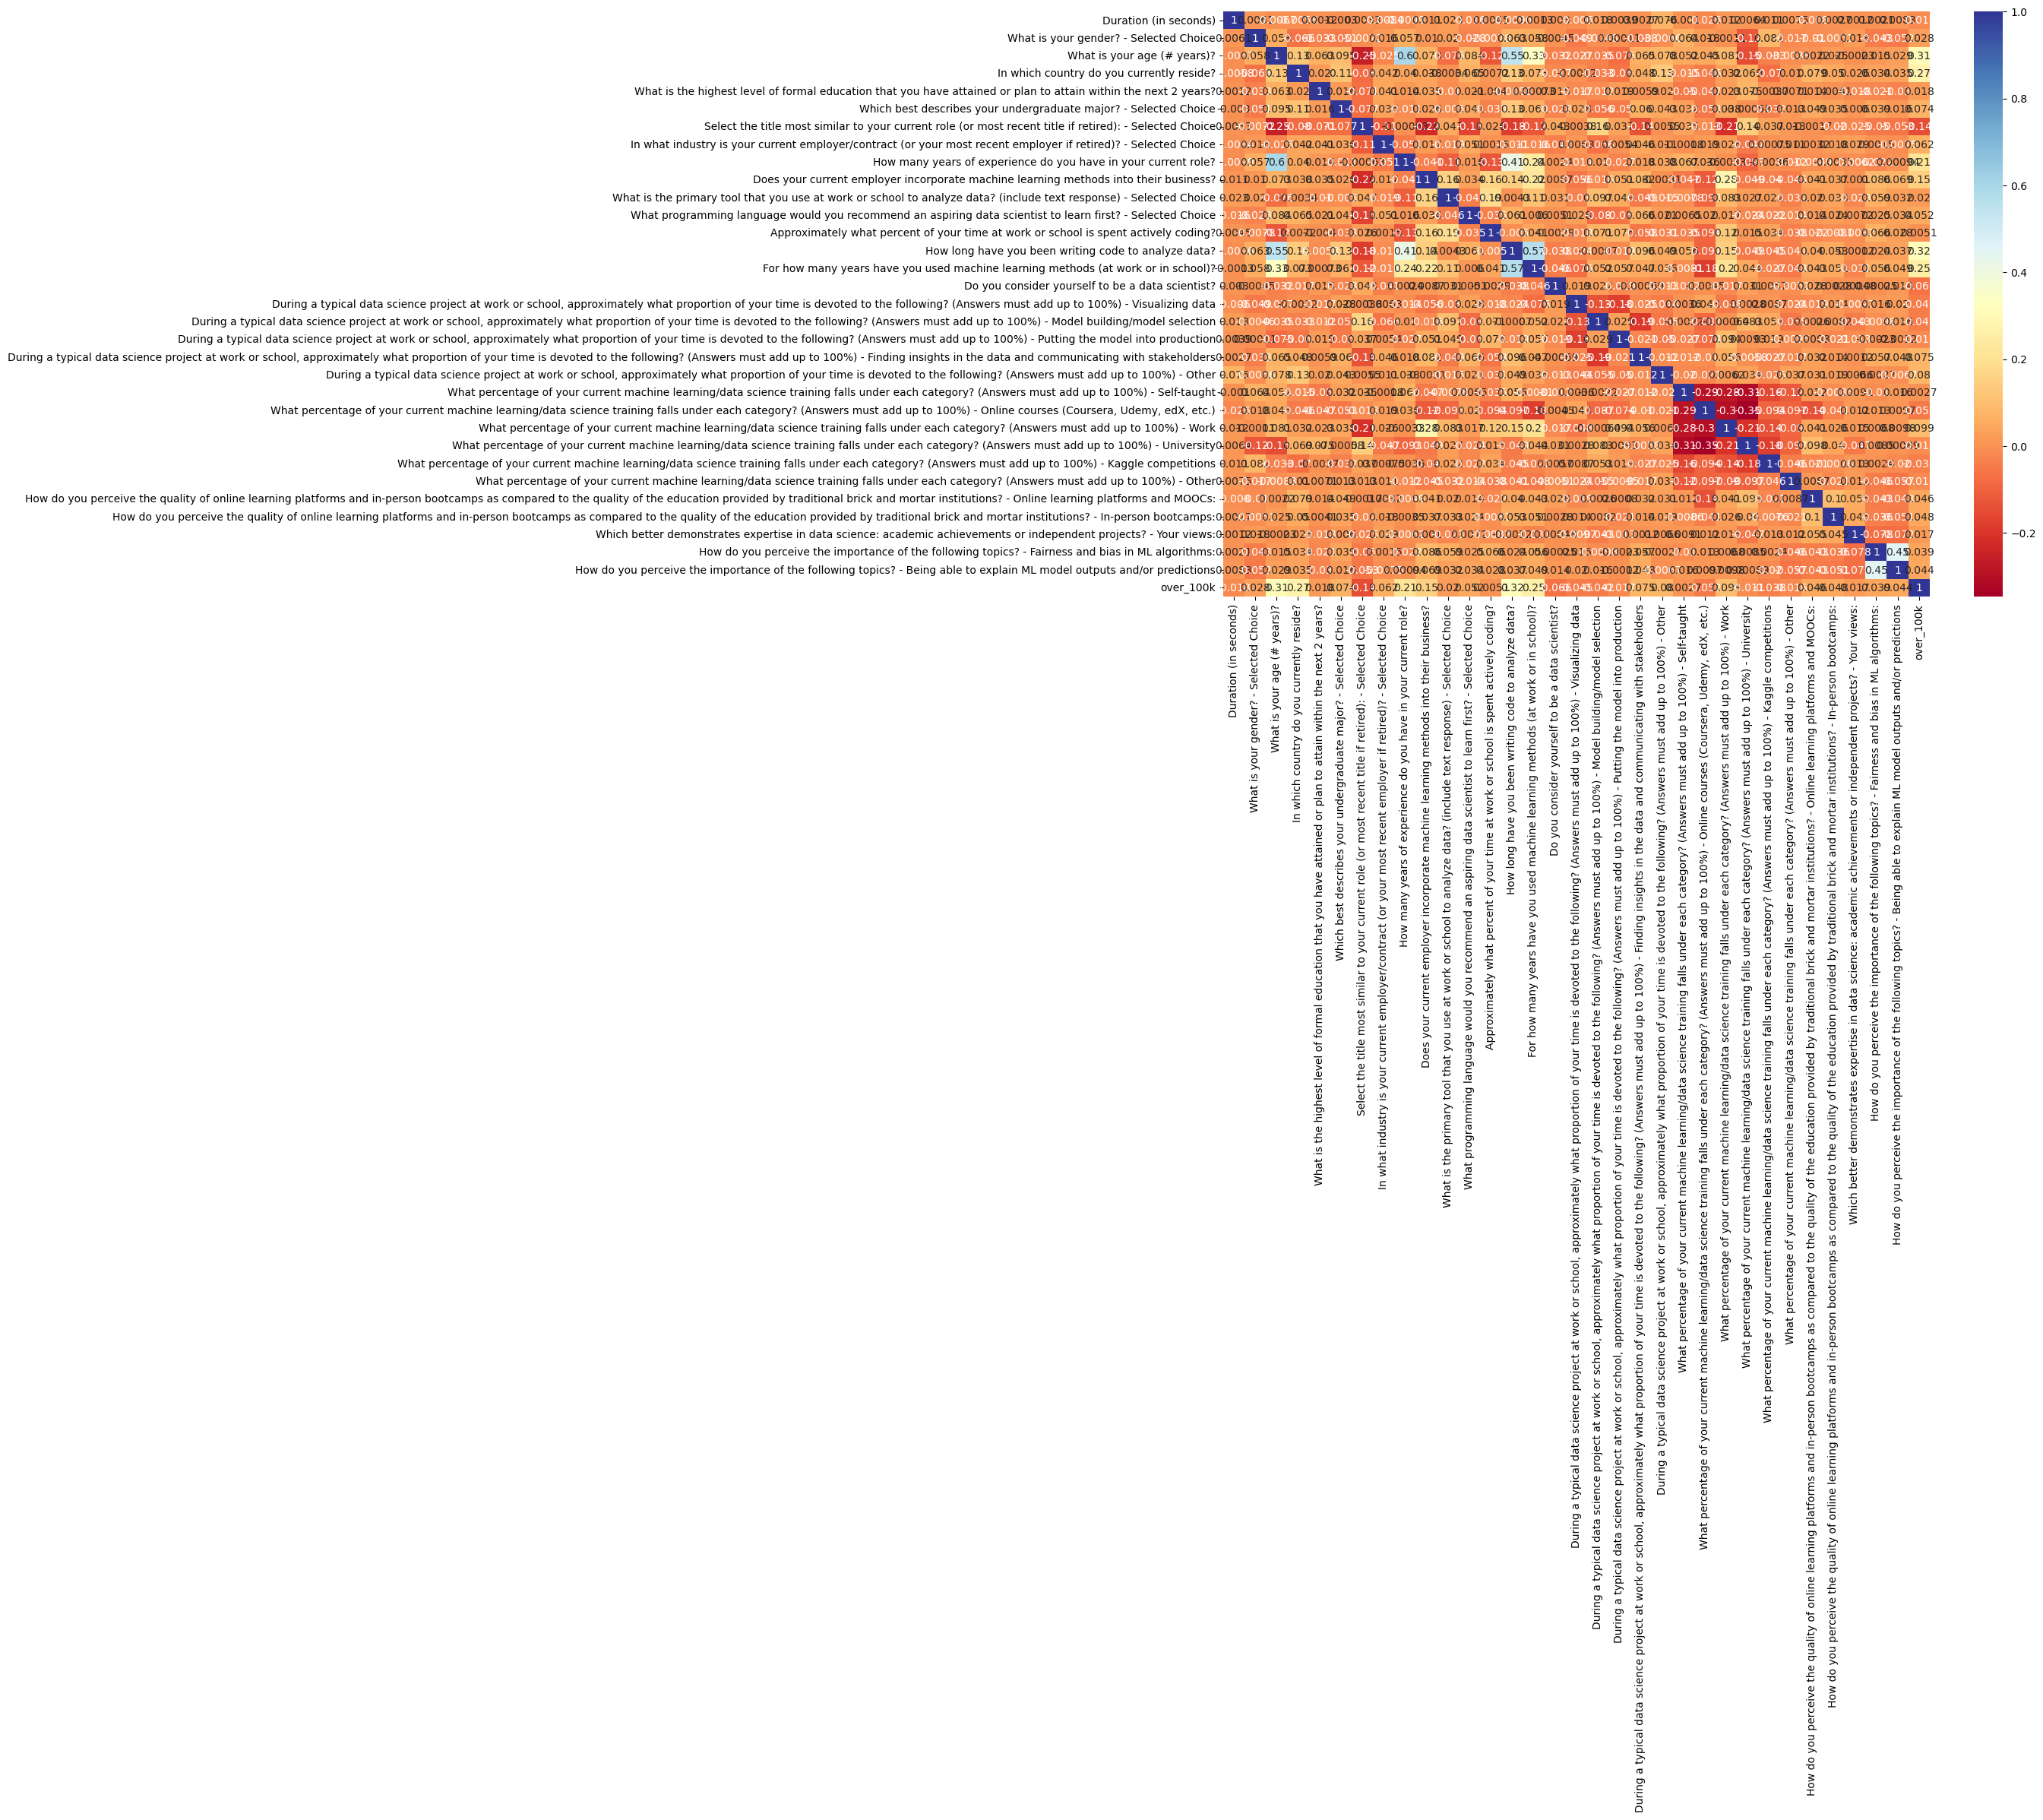

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True, cmap = "RdYlBu",)

In [15]:
#check if the dataset is imbalanced
dataset['over_100k'].value_counts()

over_100k
0    11439
1     2043
Name: count, dtype: int64

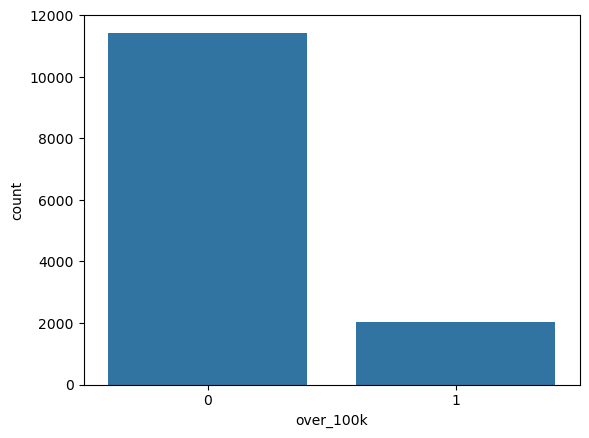

In [16]:
sns.countplot(x=dataset['over_100k'])
None

We will train the test without fixing the imbalanced using 3 different algorithms:
1. Random Forest
2. ADA BOOST
3. GRADIENT BOOST
4. lightGBM 
5. XGBoost

1.Train a random forest classifier using all the features that we processed.

In [17]:
#  import random forest
from sklearn.ensemble import RandomForestClassifier

In [18]:
X=dataset.drop(['over_100k'],axis=1)
y=dataset['over_100k']
y.shape
# take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)

In [19]:
#X test is the 25% of rows the rest 75% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [20]:
# call the random forest and initialise it
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
#  fit the random forest in the train dataset
rf.fit(X_train, y_train)

# predict the labels of the test dataset
preds = rf.predict(X_test)
accuracy_score(y_test, preds)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3033, 32)
X_test:  (1012, 32)
y_train:  (3033,)
y_test:  (1012,)


2. ADA BOOST

In [21]:
abc=AdaBoostClassifier(n_estimators=500, learning_rate=0.01,random_state=0)
model_ada=abc.fit(X_train,y_train)

In [22]:
y_pred_adaboost = model_ada.predict(X_test)
print(y_pred_adaboost)

[0 0 0 ... 0 0 0]


In [23]:
print("ADABoost Model Accuracy:", accuracy_score(y_test,y_pred_adaboost))

ADABoost Model Accuracy: 0.8764822134387352


3. GRADIENT BOOST

In [24]:
gbc=GradientBoostingClassifier(n_estimators=500, learning_rate=0.01,random_state=0)
model_gbc=gbc.fit(X_train,y_train)
y_pred_gbc = model_gbc.predict(X_test)
print(y_pred_gbc)

[0 0 0 ... 0 0 0]


In [25]:
print("Gradient Boost Model Accuracy:", accuracy_score(y_test,y_pred_gbc))

Gradient Boost Model Accuracy: 0.8962450592885376




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



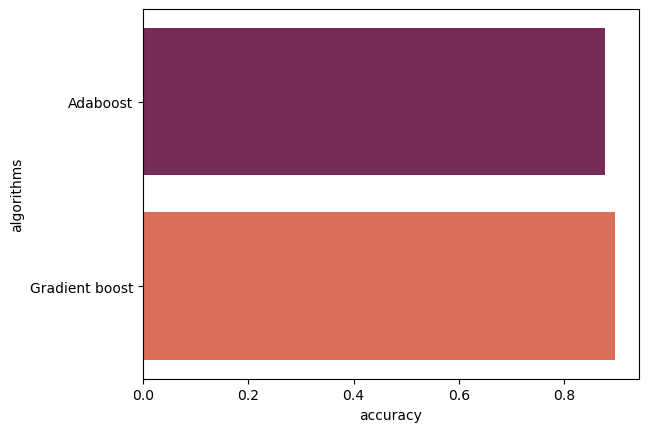

In [26]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Gradient boost'],
    "accuracy": [accuracy_score(y_test, y_pred_adaboost),accuracy_score(y_test, y_pred_gbc)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')
plt.show()

we can say that Xgboost is slightly works better than Adaboost.

Features Importances and Partial Dependence Plots

In [27]:
feat_imps = pd.DataFrame(gbc.feature_importances_)
feat_imps

,0
0,0.010551
1,0.004836
2,0.157429
3,0.423615
4,0.000018
5,0.001227
6,0.058396
7,0.048197
8,0.038592
9,0.035160


In [28]:
feat_imps.sort_values(by= 0 ,ascending=False,inplace=True)
feats20=feat_imps.head(20)
feats20

,0
3,0.423615
2,0.157429
13,0.113185
14,0.068900
6,0.058396
7,0.048197
8,0.038592
9,0.035160
0,0.010551
23,0.007812


In [29]:
lst=[]
for i in range(len(feats20)):
               lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

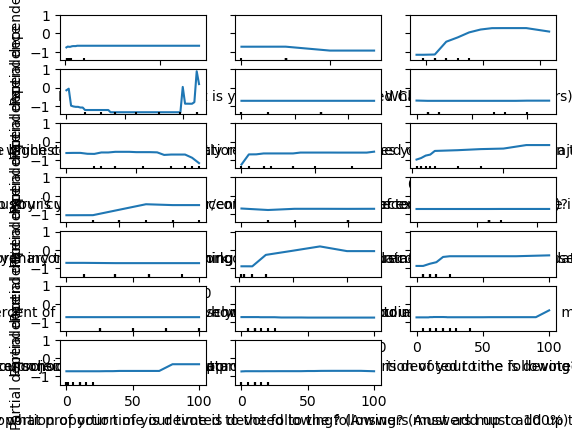

In [30]:
PartialDependenceDisplay.from_estimator(gbc, X_train, lst,kind='average')
plt.show()

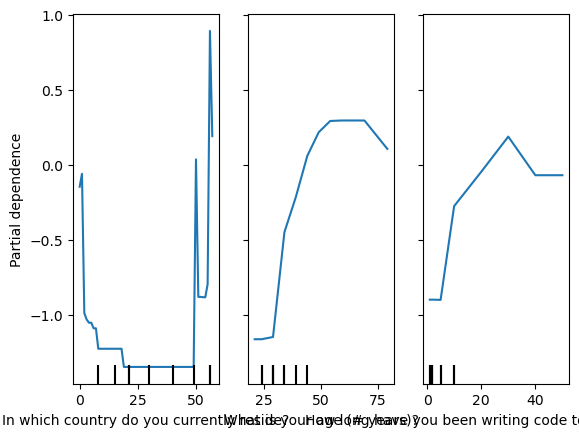

In [31]:
PartialDependenceDisplay.from_estimator(gbc, X_train, [3,2,13],kind='average')

SHAP VALUES

In [78]:
# Fit Explainer

#explainer = shap.TrExplainer(gbc.predict,X_test)
shap_values = shap.TreeExplainer(gbc).shap_values(X_train, approximate=True)
#Calculate SHAP Values
#shap_values = explainer(X_test)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


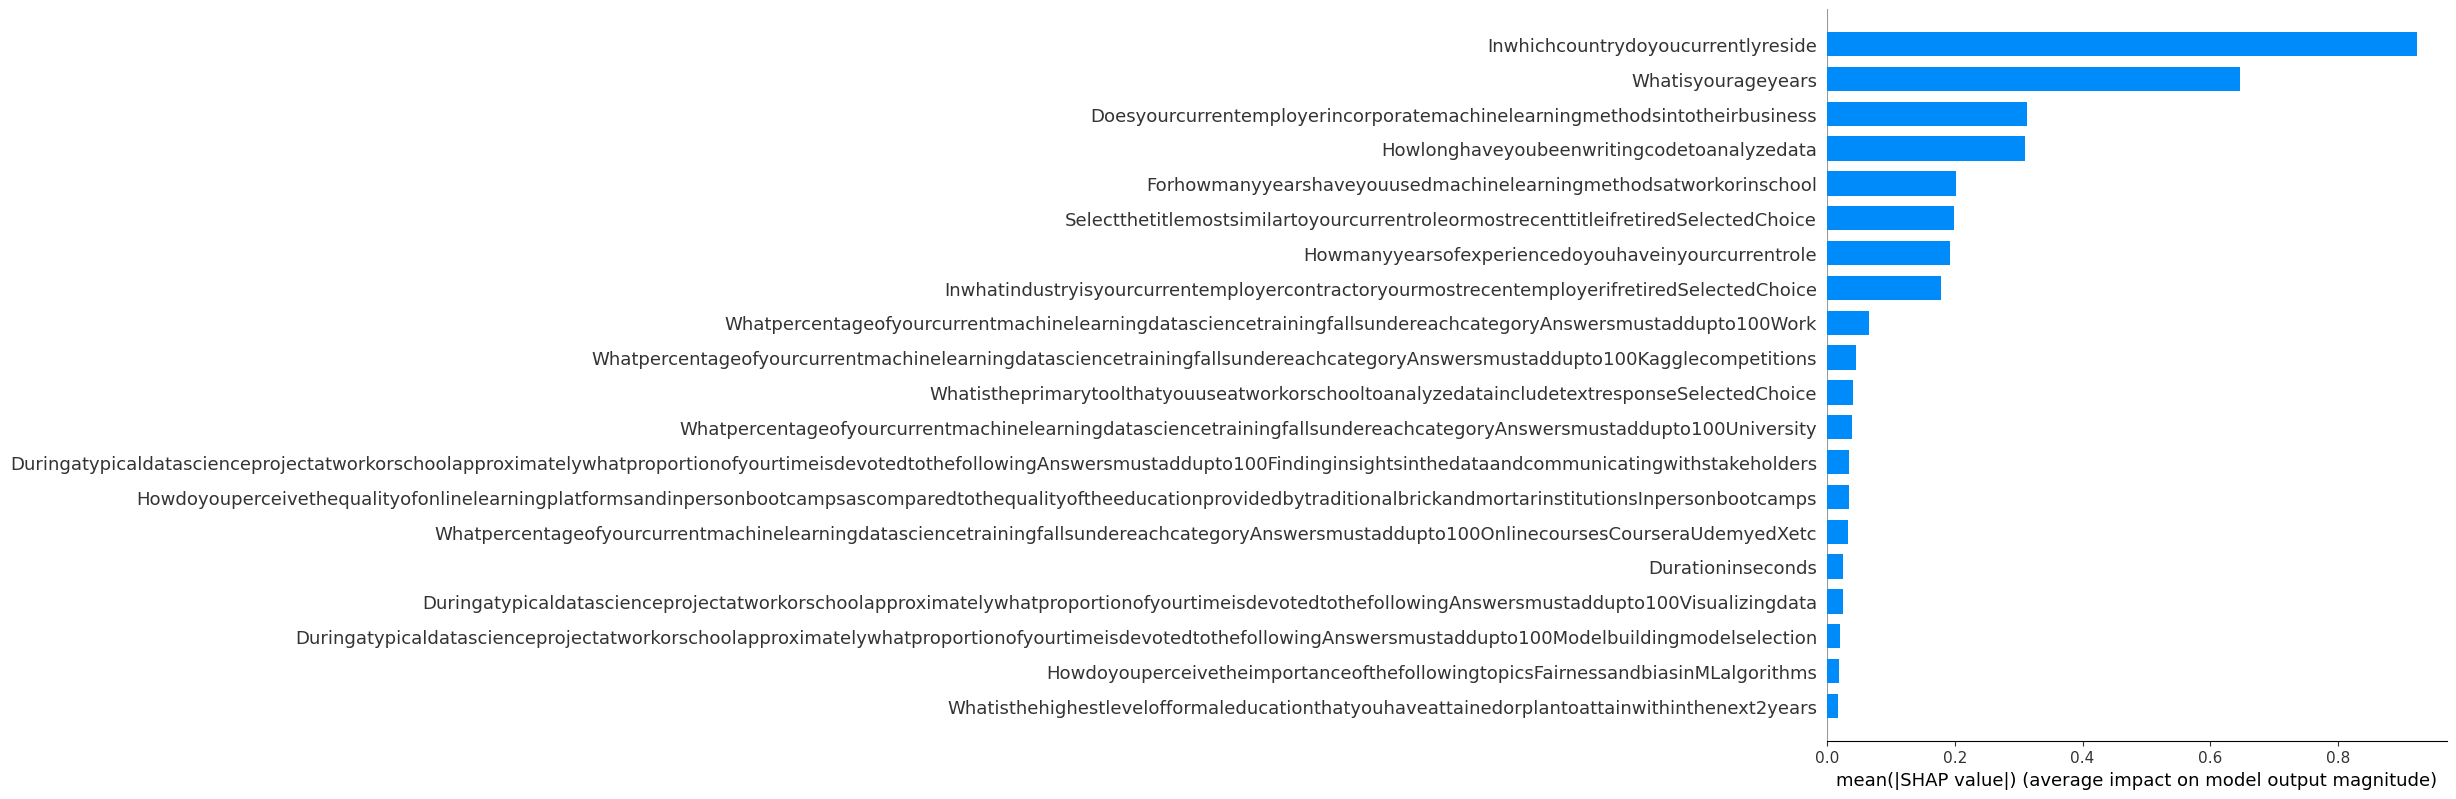

In [80]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [85]:
shap_values

array([[-2.30679640e-03,  0.00000000e+00, -7.78148295e-01, ...,
        -1.18292138e-02,  1.94190727e-01,  3.06233823e-03],
       [ 2.95031635e-02,  7.77335092e-03,  2.94243973e-01, ...,
        -2.62758068e-03,  0.00000000e+00,  2.41639073e-02],
       [ 2.72577354e-02,  0.00000000e+00,  7.07520952e-01, ...,
         1.63678582e-02,  0.00000000e+00,  1.20726796e-02],
       ...,
       [ 2.06992959e-03,  1.97221692e-04, -7.37110317e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.69466029e-03],
       [ 2.56662413e-02,  9.06611547e-04,  2.82671779e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.81324559e-02],
       [ 3.89071249e-04,  0.00000000e+00, -4.14609708e-01, ...,
        -2.62758068e-03,  0.00000000e+00,  2.00510557e-02]])

In [86]:
shap_values[1]
df=pd.DataFrame(shap_values)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.002307,0.000000,-0.778148,-0.956647,0.002349,-0.016224,0.062315,-0.136686,-0.364356,-0.233387,...,0.061284,-0.069999,0.049428,0.000000,0.000000,0.006497,-0.004373,-0.011829,0.194191,0.003062
1,0.029503,0.007773,0.294244,1.112834,-0.000283,0.000000,0.244951,0.300278,-0.000040,-0.115735,...,0.094441,-0.020577,0.030803,0.002226,0.000000,-0.001023,0.009702,-0.002628,0.000000,0.024164
2,0.027258,0.000000,0.707521,-0.998350,0.000000,0.027737,0.075835,0.001963,0.494074,-0.345007,...,0.079968,-0.020577,0.071233,0.000000,0.000000,-0.015059,0.009702,0.016368,0.000000,0.012073
3,0.011637,0.008680,0.690632,-0.927590,-0.000283,0.000000,0.025321,0.196932,-0.150611,0.288255,...,-0.051027,0.004750,0.030803,-0.096829,0.000000,-0.001023,-0.003032,0.007962,0.000000,0.000000
4,0.030641,0.009478,0.451335,-0.816993,-0.000283,0.000000,0.105323,0.149963,0.092808,0.291924,...,-0.051934,0.124625,-0.044490,-0.096829,0.000000,0.000000,0.010559,0.007962,0.000000,0.009808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0.009312,0.008769,-0.740917,-1.023596,0.093295,0.000000,-0.028816,0.137749,0.094289,0.254556,...,0.000000,-0.113539,-0.042062,-0.103852,0.000000,0.000000,0.025136,0.007962,0.000000,0.000929
3029,-0.003616,0.000000,-0.839570,-0.836693,-0.008501,0.043713,0.020434,-0.170980,-0.318492,-0.399027,...,0.061284,0.058091,0.028980,-0.007023,0.002772,-0.001023,-0.010138,0.001838,-0.023303,0.004766
3030,0.002070,0.000197,-0.737110,-0.673769,-0.008501,0.000000,-0.096521,-0.007700,-0.040341,0.327981,...,0.000907,0.125270,-0.028621,0.088584,0.002772,0.005888,0.011546,0.000000,0.000000,0.005695
3031,0.025666,0.000907,0.282672,1.154136,-0.000283,0.000000,0.169022,0.056200,-0.140390,0.196008,...,-0.051027,0.000654,-0.031048,0.081857,0.000000,0.003071,-0.003032,0.000000,0.000000,0.028132


In [89]:
df.columns=list(X)
df

,Durationinseconds,WhatisyourgenderSelectedChoice,Whatisyourageyears,Inwhichcountrydoyoucurrentlyreside,Whatisthehighestlevelofformaleducationthatyouhaveattainedorplantoattainwithinthenext2years,WhichbestdescribesyourundergraduatemajorSelectedChoice,SelectthetitlemostsimilartoyourcurrentroleormostrecenttitleifretiredSelectedChoice,InwhatindustryisyourcurrentemployercontractoryourmostrecentemployerifretiredSelectedChoice,Howmanyyearsofexperiencedoyouhaveinyourcurrentrole,Doesyourcurrentemployerincorporatemachinelearningmethodsintotheirbusiness,...,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100OnlinecoursesCourseraUdemyedXetc,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100Work,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100University,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100Kagglecompetitions,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100Other,HowdoyouperceivethequalityofonlinelearningplatformsandinpersonbootcampsascomparedtothequalityoftheeducationprovidedbytraditionalbrickandmortarinstitutionsOnlinelearningplatformsandMOOCs,HowdoyouperceivethequalityofonlinelearningplatformsandinpersonbootcampsascomparedtothequalityoftheeducationprovidedbytraditionalbrickandmortarinstitutionsInpersonbootcamps,WhichbetterdemonstratesexpertiseindatascienceacademicachievementsorindependentprojectsYourviews,HowdoyouperceivetheimportanceofthefollowingtopicsFairnessandbiasinMLalgorithms,HowdoyouperceivetheimportanceofthefollowingtopicsBeingabletoexplainMLmodeloutputsandorpredictions
0,-0.002307,0.000000,-0.778148,-0.956647,0.002349,-0.016224,0.062315,-0.136686,-0.364356,-0.233387,...,0.061284,-0.069999,0.049428,0.000000,0.000000,0.006497,-0.004373,-0.011829,0.194191,0.003062
1,0.029503,0.007773,0.294244,1.112834,-0.000283,0.000000,0.244951,0.300278,-0.000040,-0.115735,...,0.094441,-0.020577,0.030803,0.002226,0.000000,-0.001023,0.009702,-0.002628,0.000000,0.024164
2,0.027258,0.000000,0.707521,-0.998350,0.000000,0.027737,0.075835,0.001963,0.494074,-0.345007,...,0.079968,-0.020577,0.071233,0.000000,0.000000,-0.015059,0.009702,0.016368,0.000000,0.012073
3,0.011637,0.008680,0.690632,-0.927590,-0.000283,0.000000,0.025321,0.196932,-0.150611,0.288255,...,-0.051027,0.004750,0.030803,-0.096829,0.000000,-0.001023,-0.003032,0.007962,0.000000,0.000000
4,0.030641,0.009478,0.451335,-0.816993,-0.000283,0.000000,0.105323,0.149963,0.092808,0.291924,...,-0.051934,0.124625,-0.044490,-0.096829,0.000000,0.000000,0.010559,0.007962,0.000000,0.009808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0.009312,0.008769,-0.740917,-1.023596,0.093295,0.000000,-0.028816,0.137749,0.094289,0.254556,...,0.000000,-0.113539,-0.042062,-0.103852,0.000000,0.000000,0.025136,0.007962,0.000000,0.000929
3029,-0.003616,0.000000,-0.839570,-0.836693,-0.008501,0.043713,0.020434,-0.170980,-0.318492,-0.399027,...,0.061284,0.058091,0.028980,-0.007023,0.002772,-0.001023,-0.010138,0.001838,-0.023303,0.004766
3030,0.002070,0.000197,-0.737110,-0.673769,-0.008501,0.000000,-0.096521,-0.007700,-0.040341,0.327981,...,0.000907,0.125270,-0.028621,0.088584,0.002772,0.005888,0.011546,0.000000,0.000000,0.005695
3031,0.025666,0.000907,0.282672,1.154136,-0.000283,0.000000,0.169022,0.056200,-0.140390,0.196008,...,-0.051027,0.000654,-0.031048,0.081857,0.000000,0.003071,-0.003032,0.000000,0.000000,0.028132


In [94]:
k=pd.DataFrame(np.abs(df).mean()).reset_index()
top20_features_gbc=k.sort_values(by=0,ascending=False).head(20)
top20_features_gbc

,index,0
3,Inwhichcountrydoyoucurrentlyreside,0.923548
2,Whatisyourageyears,0.646064
9,Doesyourcurrentemployerincorporatemachinelearn...,0.313337
13,Howlonghaveyoubeenwritingcodetoanalyzedata,0.309415
14,Forhowmanyyearshaveyouusedmachinelearningmetho...,0.201722
6,Selectthetitlemostsimilartoyourcurrentroleormo...,0.199491
8,Howmanyyearsofexperiencedoyouhaveinyourcurrent...,0.192856
7,Inwhatindustryisyourcurrentemployercontractory...,0.177937
23,Whatpercentageofyourcurrentmachinelearningdata...,0.065494
25,Whatpercentageofyourcurrentmachinelearningdata...,0.046146


Features Importances

Beeswarm Plot


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


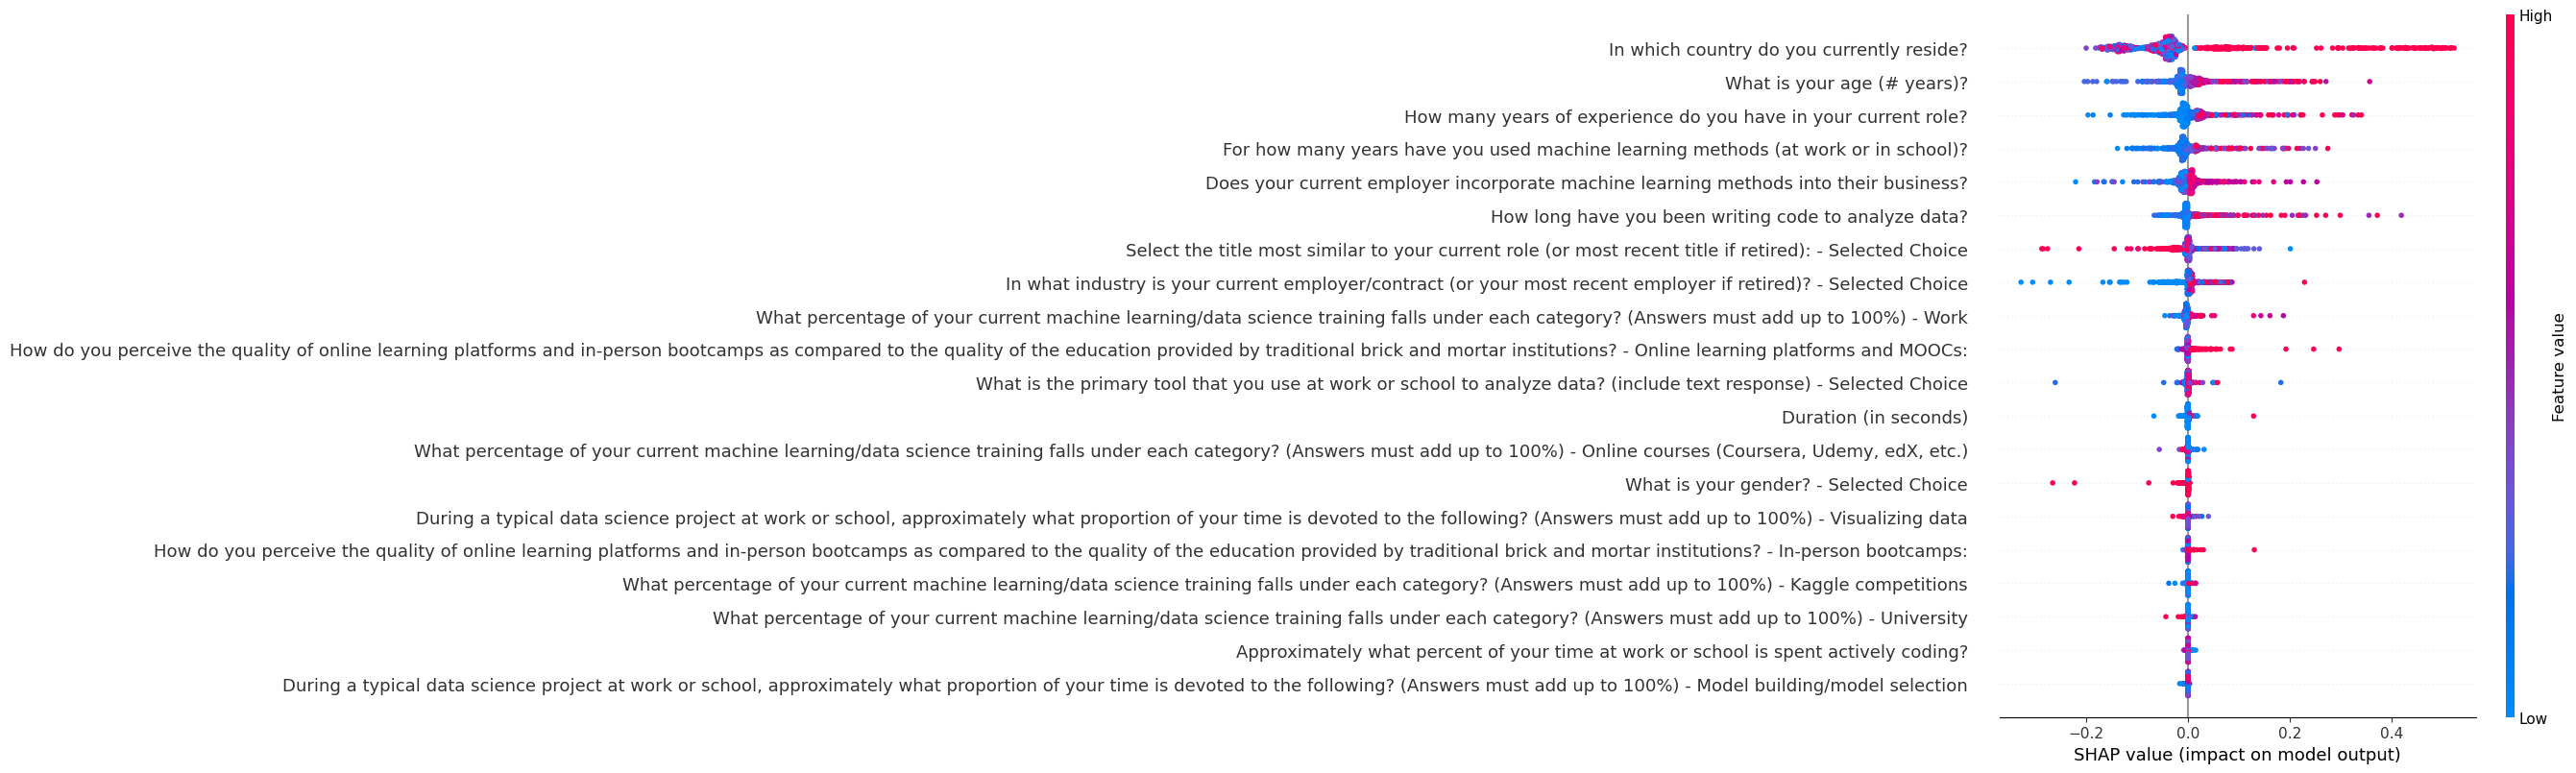

In [34]:
shap.summary_plot(shap_values)

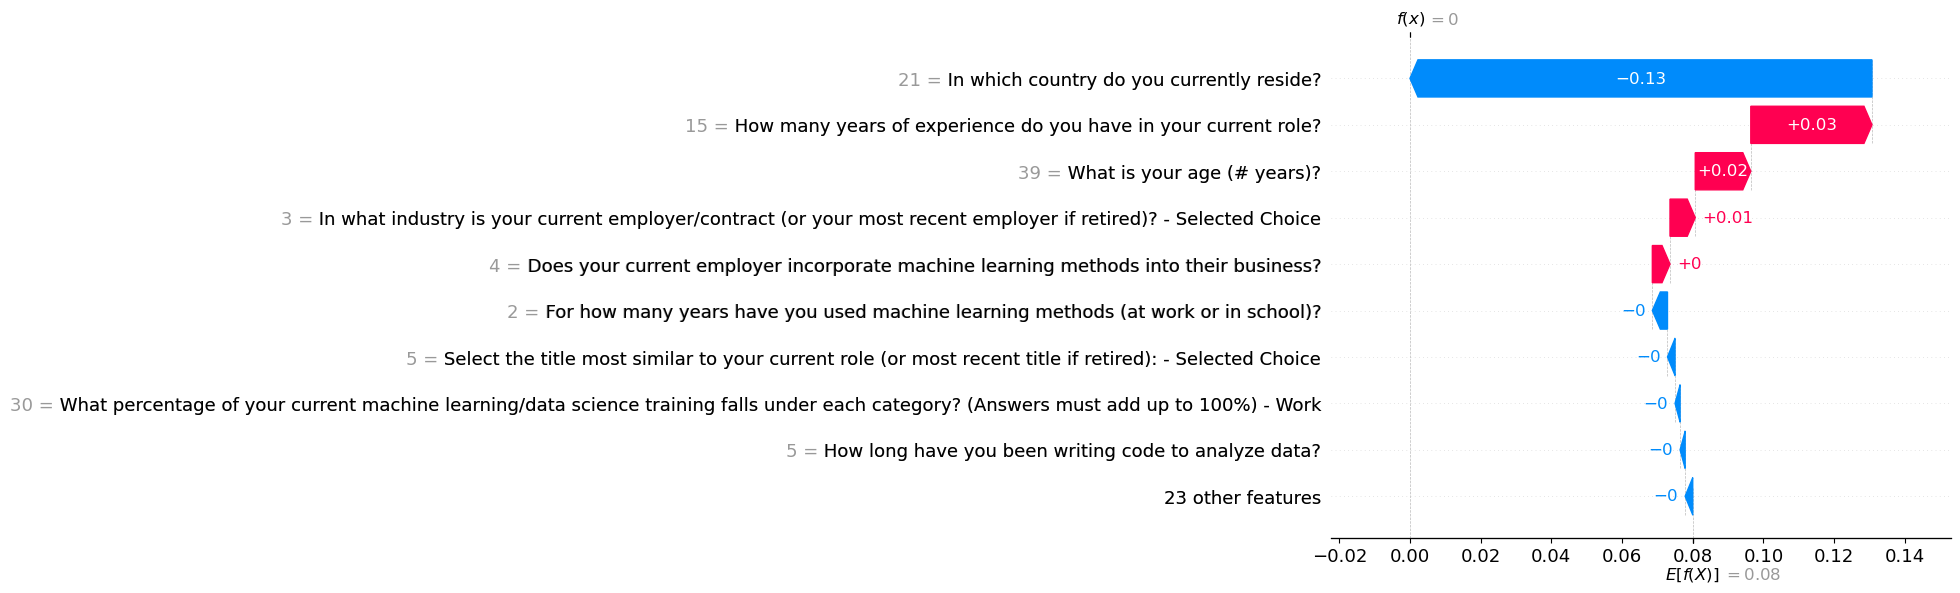

In [35]:
shap.plots.waterfall(shap_values[1])

In [36]:
shap.initjs()
shap.plots.force(shap_values[1])

In [37]:
le_namemapping = dict(zip(le.classes_ , le.transform(le.classes_)))
print(le_namemapping)

{'No opinion; I do not know': 0, 'Not at all important': 1, 'Slightly important': 2, 'Very important': 3}


4.lightGBM 

In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [39]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [40]:
print(lgb.__version__)

4.3.0


In [41]:
import re
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [42]:
#define dataset
X=dataset.drop(['over_100k'],axis=1)
y=dataset['over_100k']
y.shape
# take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)

#X test is the 25% of rows the rest 75% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

#define the model
model=LGBMClassifier(learning_rate=0.01,random_state=0)
#fit the model
lgb_model=model.fit(X_train,y_train)

#predict
y_pred_lgb = lgb_model.predict(X_test)
print(y_pred_lgb)


[LightGBM] [Info] Number of positive: 458, number of negative: 2575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 3033, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151006 -> initscore=-1.726736
[LightGBM] [Info] Start training from score -1.726736
[0 0 0 ... 0 0 0]


In [43]:
# view accuracy
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgb)))

LightGBM Model accuracy score: 0.8765


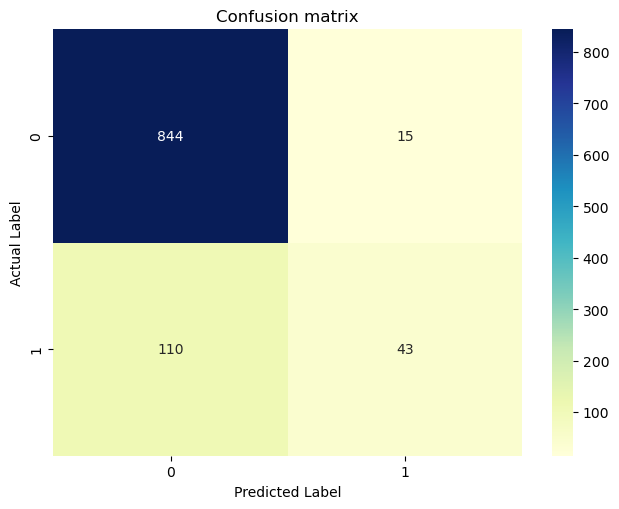

In [44]:
# visualize confusion matrix with seaborn heatmap

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgb)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
None

In [45]:
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       859
           1       0.74      0.28      0.41       153

    accuracy                           0.88      1012
   macro avg       0.81      0.63      0.67      1012
weighted avg       0.86      0.88      0.85      1012





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



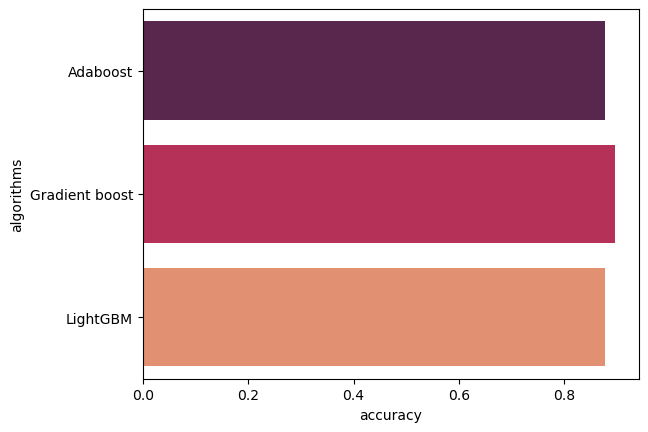

In [46]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Gradient boost',"LightGBM"],
    "accuracy": [accuracy_score(y_test, y_pred_adaboost),accuracy_score(y_test, y_pred_gbc),accuracy_score(y_test, y_pred_lgb)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')
plt.show()

5. XGBoost

In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBClassifier

In [50]:
#define dataset
X=dataset.drop(['over_100k'],axis=1)
y=dataset['over_100k']
y.shape
# take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)

#X test is the 25% of rows the rest 75% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

#define the model
xgb=XGBClassifier(learning_rate=0.01,random_state=0)
#fit the model
xgb_model=xgb.fit(X_train,y_train)

#predict
y_pred_xgb = xgb_model.predict(X_test)
print(y_pred_xgb)

[0 0 0 ... 0 0 0]


In [61]:
# view accuracy
print('XGBOOST Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))
print(classification_report(y_test, y_pred_xgb))

XGBOOST Model accuracy score: 0.8735
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       859
           1       0.72      0.27      0.39       153

    accuracy                           0.87      1012
   macro avg       0.80      0.62      0.66      1012
weighted avg       0.86      0.87      0.85      1012





Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



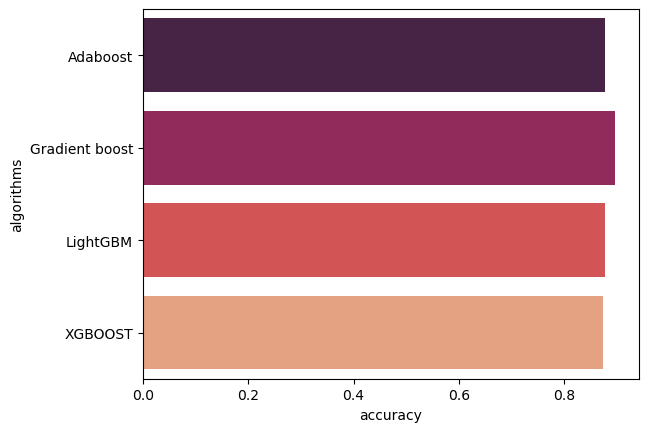

In [53]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Gradient boost',"LightGBM","XGBOOST"],
    "accuracy": [accuracy_score(y_test, y_pred_adaboost),accuracy_score(y_test, y_pred_gbc),accuracy_score(y_test, y_pred_lgb),accuracy_score(y_test, y_pred_xgb)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')
plt.show()

We can see that the Gradient Boost has the best perform of 4 algorithms for the initial imbalanced dataset.

Downsampling

In [54]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.25, random_state=0)
y_train_d.value_counts()

over_100k
0    2566
1     467
Name: count, dtype: int64

In [56]:
data_down = pd.concat([X_train_d, y_train_d], axis = 1)
data_down = data_down.groupby('over_100k', as_index = False).apply(lambda x: x.sample(n=467, random_state=0)).reset_index(drop=True)
X_train_d = data_down.drop(['over_100k'],axis=1)
y_train_d = data_down['over_100k']

In [62]:
#ADA BOOST
abc=AdaBoostClassifier(learning_rate=0.01,random_state=0)
model_ada_d=abc.fit(X_train_d,y_train_d)
y_pred_d_adaboost = model_ada_d.predict(X_test_d)
print(y_pred_d_adaboost)
print("ADABoost downsampling Model Accuracy:", accuracy_score(y_test_d,y_pred_d_adaboost))
print(classification_report(y_test_d, y_pred_d_adaboost))

#GRADIENT BOOST
gbc=GradientBoostingClassifier(n_estimators=500, learning_rate=0.01,random_state=0)
model_gbc_d=gbc.fit(X_train_d,y_train_d)
y_pred_gbc_d = model_gbc_d.predict(X_test_d)
print(y_pred_gbc_d)
print("GRADIENT BOOST downsampling Model Accuracy:", accuracy_score(y_test_d,y_pred_gbc_d))
print(classification_report(y_test_d, y_pred_gbc_d))

#LIGHTGBM
model=LGBMClassifier(learning_rate=0.01,random_state=0)
lgb_model_d=model.fit(X_train_d,y_train_d)
y_pred_lgb_d = lgb_model_d.predict(X_test_d)
print(y_pred_lgb_d)
print("LightGBM downsampling Model Accuracy:", accuracy_score(y_test_d,y_pred_lgb_d))
print(classification_report(y_test_d, y_pred_lgb_d))

#XGBOOST
xgb=XGBClassifier(learning_rate=0.01,random_state=0)
xgb_model_d=xgb.fit(X_train,y_train)

#predict
y_pred_xgb_d = xgb_model_d.predict(X_test)
print(y_pred_xgb_d)
print("XGBOOST downsampling Model Accuracy:",accuracy_score(y_test_d,y_pred_xgb_d))
print(classification_report(y_test_d, y_pred_xgb_d))


[0 1 1 ... 1 0 0]
ADABoost downsampling Model Accuracy: 0.7401185770750988
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       868
           1       0.33      0.82      0.47       144

    accuracy                           0.74      1012
   macro avg       0.65      0.77      0.65      1012
weighted avg       0.87      0.74      0.78      1012

[0 1 0 ... 1 0 0]
GRADIENT BOOST downsampling Model Accuracy: 0.8053359683794467
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       868
           1       0.41      0.83      0.55       144

    accuracy                           0.81      1012
   macro avg       0.69      0.81      0.71      1012
weighted avg       0.89      0.81      0.83      1012

[LightGBM] [Info] Number of positive: 467, number of negative: 467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



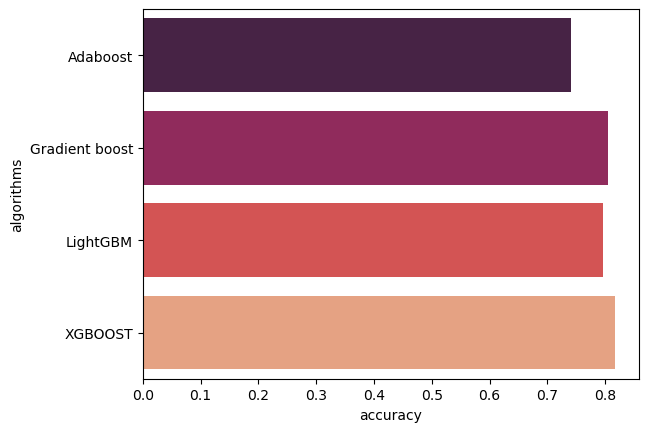

In [60]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Gradient boost',"LightGBM","XGBOOST"],
    "accuracy": [accuracy_score(y_test_d,y_pred_d_adaboost),accuracy_score(y_test_d,y_pred_gbc_d),accuracy_score(y_test_d,y_pred_lgb_d),accuracy_score(y_test_d,y_pred_xgb_d)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')
plt.show()

We can see that after the downsampling method the XGBOOST algorithm has the best perfrom of all agrorithms.
Then, we use the top 20 features that were generated from the SHAP method and perform the Gradient Boost for the imbalanced set and the XGBOOST for the downsampling set

In [102]:
top20_features_gbc

,index,0
3,Inwhichcountrydoyoucurrentlyreside,0.923548
2,Whatisyourageyears,0.646064
9,Doesyourcurrentemployerincorporatemachinelearn...,0.313337
13,Howlonghaveyoubeenwritingcodetoanalyzedata,0.309415
14,Forhowmanyyearshaveyouusedmachinelearningmetho...,0.201722
6,Selectthetitlemostsimilartoyourcurrentroleormo...,0.199491
8,Howmanyyearsofexperiencedoyouhaveinyourcurrent...,0.192856
7,Inwhatindustryisyourcurrentemployercontractory...,0.177937
23,Whatpercentageofyourcurrentmachinelearningdata...,0.065494
25,Whatpercentageofyourcurrentmachinelearningdata...,0.046146


In [108]:
#turn the columns names of top20 features to a list so we can insert them into the dataset
top20featlist=list(top20_features_gbc['index'])

In [109]:
dataset[top20featlist]

,Inwhichcountrydoyoucurrentlyreside,Whatisyourageyears,Doesyourcurrentemployerincorporatemachinelearningmethodsintotheirbusiness,Howlonghaveyoubeenwritingcodetoanalyzedata,Forhowmanyyearshaveyouusedmachinelearningmethodsatworkorinschool,SelectthetitlemostsimilartoyourcurrentroleormostrecenttitleifretiredSelectedChoice,Howmanyyearsofexperiencedoyouhaveinyourcurrentrole,InwhatindustryisyourcurrentemployercontractoryourmostrecentemployerifretiredSelectedChoice,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100Work,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100Kagglecompetitions,WhatistheprimarytoolthatyouuseatworkorschooltoanalyzedataincludetextresponseSelectedChoice,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100University,DuringatypicaldatascienceprojectatworkorschoolapproximatelywhatproportionofyourtimeisdevotedtothefollowingAnswersmustaddupto100Findinginsightsinthedataandcommunicatingwithstakeholders,HowdoyouperceivethequalityofonlinelearningplatformsandinpersonbootcampsascomparedtothequalityoftheeducationprovidedbytraditionalbrickandmortarinstitutionsInpersonbootcamps,WhatpercentageofyourcurrentmachinelearningdatasciencetrainingfallsundereachcategoryAnswersmustaddupto100OnlinecoursesCourseraUdemyedXetc,Durationinseconds,DuringatypicaldatascienceprojectatworkorschoolapproximatelywhatproportionofyourtimeisdevotedtothefollowingAnswersmustaddupto100Visualizingdata,DuringatypicaldatascienceprojectatworkorschoolapproximatelywhatproportionofyourtimeisdevotedtothefollowingAnswersmustaddupto100Modelbuildingmodelselection,HowdoyouperceivetheimportanceofthefollowingtopicsFairnessandbiasinMLalgorithms,Whatisthehighestlevelofformaleducationthatyouhaveattainedorplantoattainwithinthenext2years
1,56,34.0,0,10.0,1.0,7,1.0,7,0.0,0.0,4,100.0,0.0,4,0.0,718.0,20.0,50.0,3,3
2,21,24.0,0,10.0,3.0,4,1.0,7,20.0,0.0,0,20.0,23.0,0,40.0,731.0,20.0,10.0,1,3
3,10,29.0,2,5.0,1.0,7,1.0,3,10.0,30.0,4,0.0,0.0,3,20.0,1142.0,13.0,30.0,3,0
4,8,39.0,1,1.0,1.0,11,15.0,0,30.0,0.0,1,0.0,20.0,2,20.0,959.0,50.0,0.0,2,1
5,21,21.0,4,1.0,1.0,11,1.0,16,20.0,0.0,4,0.0,5.0,4,5.0,1758.0,20.0,20.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20060,21,29.0,1,5.0,0.0,3,4.0,8,0.0,0.0,5,0.0,15.0,0,60.0,872.0,20.0,25.0,3,0
20065,54,44.0,0,2.0,0.0,9,3.0,3,0.0,20.0,1,0.0,35.0,3,30.0,907.0,5.0,0.0,3,3
20068,37,29.0,2,2.0,1.0,17,2.0,3,50.0,0.0,2,15.0,10.0,3,25.0,697.0,20.0,5.0,2,0
20069,55,39.0,1,30.0,10.0,15,15.0,0,20.0,0.0,4,10.0,10.0,4,10.0,940.0,40.0,10.0,3,1


In [107]:
#Shap values of Gradient Boost-imbalanced set
#define dataset
X=dataset[top20featlist]
y=dataset['over_100k']
y.shape
# take only a sample of the dataset created
X=X.sample(frac=0.3,random_state=42)
y=y.sample(frac=0.3,random_state=42)

#X test is the 25% of rows the rest 75% is the training test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

#define the model
gbc=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
#fit the model
gbc_model2=gbc.fit(X_train,y_train)

#predict
y_pred_gbc2 = gbc_model2.predict(X_test)
print(y_pred_gbc2)
print("GRADIENT BOOST Top20feat. Model Accuracy:", accuracy_score(y_test,y_pred_gbc2))
print(classification_report(y_test, y_pred_gbc2))


[0 0 0 ... 0 0 0]
GRADIENT BOOST Top20feat. Model Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       859
           1       0.73      0.22      0.33       153

    accuracy                           0.87      1012
   macro avg       0.80      0.60      0.63      1012
weighted avg       0.85      0.87      0.84      1012

